I'll be compiling and experimenting with various methods of prediction. Also I want to experiment and learn the best practices on how to approach a problem. This may also serve as a "tutorial" for others.
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

- Question or problem definition.
- Acquire training and testing data.
- Wrangle, prepare, cleanse the data.
- Analyze, identify patterns, and explore the data.
- Model, predict and solve the problem.
- Visualize, report, and present the problem solving steps and final solution.
- Supply or submit the results.

  
<br>

*The sinking of the Titanic is one of the most infamous shipwrecks in history.*

*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

*While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.*

*In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).*


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### Loading available data

In [2]:
train_data = pd.read_csv('Downloads/titanic/train.csv')
test_data = pd.read_csv('Downloads/titanic/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

EDA techniques allow for effective manipulation of data sources, enabling data scientists to find the answers they need by discovering data patterns, spotting anomalies, checking assumptions, or testing a hypothesis. 

Data specialists primarily use exploratory data analysis to discern what datasets can reveal further beyond formal modeling of data or hypothesis testing tasks. This enables them to gain in-depth knowledge of the variables in datasets and their relationships.  

Exploratory data analysis can help detect obvious errors, identify outliers in datasets, understand relationships, unearth important factors, find patterns within data, and provide new insights. 
It's about finding correlations between features. By doing this, we can gain a strong insight into which feature should be used. We need to create the ability to interpret pictures.

There are four exploratory data analysis techniques that data experts use, which include:

Univariate Non-Graphical

This is the simplest type of EDA, where data has a single variable. Since there is only one variable, data professionals do not have to deal with relationships. 

Univariate Graphical

Non-graphical techniques do not present the complete picture of data. Therefore, for comprehensive EDA, data specialists implement graphical methods, such as stem-and-leaf plots, box plots, and histograms. 

Multivariate Non-Graphical

Multivariate data consists of several variables. Non-graphic multivariate EDA methods illustrate relationships between 2 or more data variables using statistics or cross-tabulation.

Multivariate Graphical

This EDA technique makes use of graphics to show relationships between 2 or more datasets. The widely-used multivariate graphics include bar chart, bar plot, heat map, bubble chart, run chart, multivariate chart, and scatter plot. 

In [3]:
df = train_data


def all_about_my_data(df):
    print("Here is some Basic Ground Info about the data:\n")
    
    # Shape of the data
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())
    #percentage if i want (df.isna().sum()/df.shape[0])*100))
    
    print("\nFeatures Types:")
    for column in df.columns:
        print("Column ", column, "is dtype:", df[column].dtype.name)

all_about_my_data(df)

Here is some Basic Ground Info about the data:

Number of Instances: 891
Number of Features: 12

Summary Stats:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
m

## Feature Selection

Target variable: survived, 0 or 1


Relevant features related to the surviving rate: Fare and Pclass.

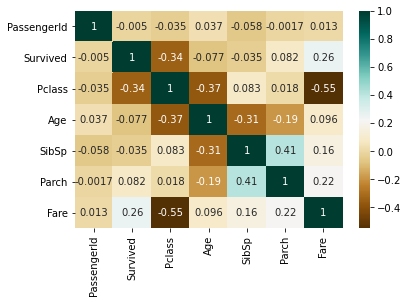

            Pclass  Survived
Pclass    1.000000 -0.338481
Survived -0.338481  1.000000
              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000


In [4]:
# Filter method: Pearson correlation all features
correlation_mat = train_data.corr()
sns.heatmap(correlation_mat, annot = True, cmap="BrBG")
plt.show()

#highest corr with survival: pclass, fare
#fare-pclass, age-pclass, parch-sibsp

print(train_data[['Pclass', 'Survived']].corr())
print(train_data[['Fare', 'Survived']].corr())

In [5]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Visualizations

Histograms, Distplots, kdeplots are your friends

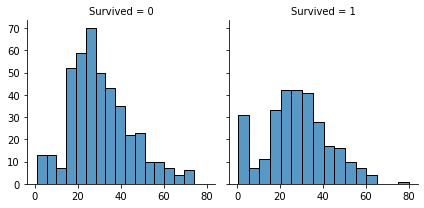

In [6]:
#Facetgrid is like a multi-plot grid for plotting conditional relationships. This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.
#Histplot is only about the COUNT (or density, or probability) of a column/feature.

#Histogram of survival(1) and death (0) by age.
survived_grid = sns.FacetGrid(train_data, col='Survived')
survived_grid.map_dataframe(sns.histplot, x='Age', bins=16)

<AxesSubplot:xlabel='Age', ylabel='Count'>

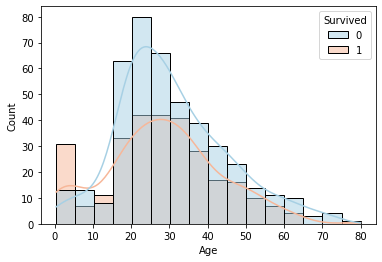

In [7]:
#Another graphical representation of survival by age
sns.histplot(train_data, x='Age', hue='Survived',multiple="layer", bins=16, palette='RdBu_r', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

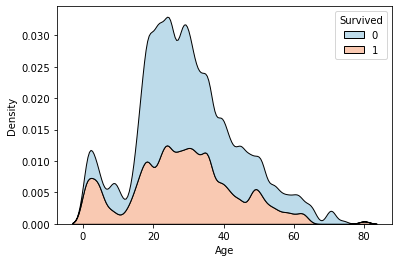

In [8]:
#kde plot (continuous probability density curve in one or more dimensions) but less smooth
sns.kdeplot(data=train_data, x='Age', hue='Survived', bw_adjust=.3, multiple='stack', palette='RdBu_r')

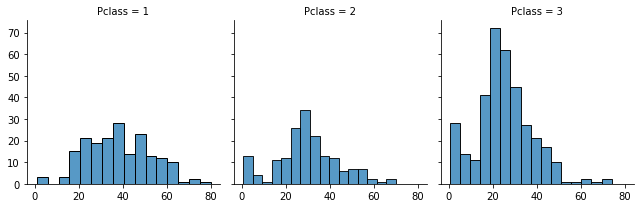

In [9]:
#Histogram of Passenger Class by age.
pclass_grid = sns.FacetGrid(train_data, col='Pclass')
pclass_grid.map_dataframe(sns.histplot, x='Age', bins=16)

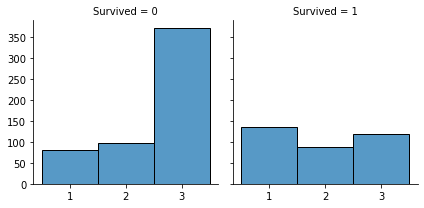

In [10]:
#Survival by Passenger Class
survived_p_grid = sns.FacetGrid(train_data, col='Survived')
survived_p_grid.map_dataframe(sns.histplot, x='Pclass', bins=3, discrete=True)

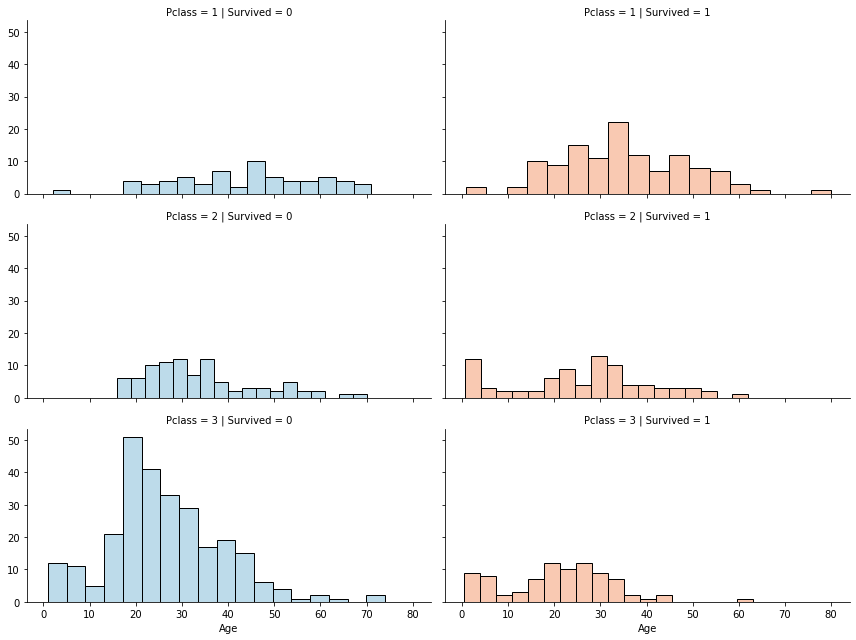

In [11]:
#Combining age, survival, pclass
triple_grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', hue='Survived', aspect=2, palette='RdBu_r')
triple_grid.map_dataframe(sns.histplot, 'Age', bins=18)

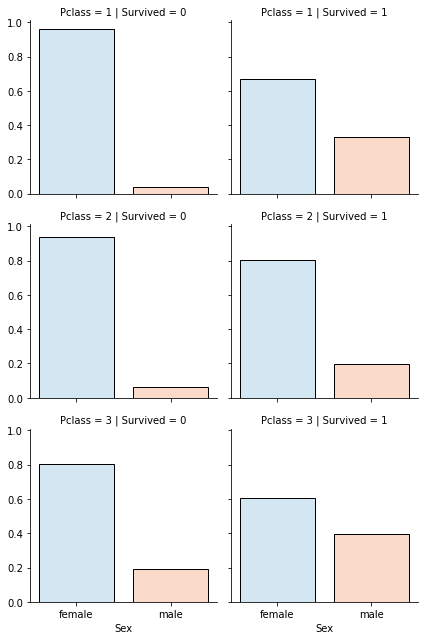

In [12]:
#Combining age, survival, pclass
triple_grid = sns.FacetGrid(train_data, col='Survived', row='Pclass')
triple_grid.map_dataframe(sns.histplot, 'Sex', shrink=0.8, stat="density", hue='Sex',  palette='RdBu_r')


   # count shows the number of observations

  #  frequency shows the number of observations divided by the bin width

 #   density normalizes counts so that the area of the histogram is 1

#    probability normalizes counts so that the sum of the bar heights is 1


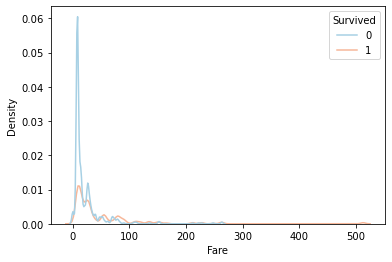

In [13]:
#Another graphical representation of survival by FARE - we can see an outlier
survived_fare = sns.kdeplot(data=train_data, x='Fare', hue='Survived', bw_adjust=.2, palette='RdBu_r', levels=100)

# Dealing with missing values

Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2



In [14]:
#state of things

combined_data = [train_data, test_data]

def visual_report(combined_data):
    for data in combined_data:
        print(data.isnull().sum())
        print('*' * 20)
      
visual_report(combined_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
********************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
********************


In [15]:
# filling the nan values fo Age and fare column with the mean while Embarked column with most_frequent value
for data in combined_data:
    data.Age.fillna(data.Age.mean(), inplace = True)
    data.Fare.fillna(data.Fare.mean(), inplace = True)
    
# from visualization we know that Southamptom is most frequent Embarked place so, filling the missing value 
# with 'S'
train_data.Embarked.fillna('S', inplace = True)

#Mapping dual categorical data
train_data.Sex = train_data.Sex.map({'female':1, 'male':0})
test_data.Sex = test_data.Sex.map({'female':1, 'male':0})

In [16]:
#Mapping 3 categorie data
change = {'S':1,'C':2,'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)

train_data.Embarked.fillna(train_data.Embarked.mean(), inplace=True)

In [17]:
# before filling the missing values, let's drop Cabin column from both data.
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

In [18]:
# now lets drop SibSp and Parch column for both training and testing data
train_data.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp','Parch'], axis = 1, inplace = True )

columns_to_drop = ['PassengerId','Ticket','Name']
train_data.drop(columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns_to_drop[1:], axis = 1, inplace = True)

visual_report(combined_data)

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64
********************
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64
********************


In [19]:
#binning

for dataset in combined_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4


for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 2
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 3
    data.loc[(data['Fare'] >= 100),'Fare'] = 4

visual_report(combined_data)

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64
********************
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64
********************


In [20]:
X_train = train_data.drop("Survived", axis=1) #fit

Y_train = train_data["Survived"] #predict

X_test = test_data.drop("PassengerId", axis = 1) #evaluate

print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (891, 5)
Shape of Y_train (891,)
Shape of x_test (418, 5)


# Neural Networks

In [21]:
import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

### First try

In [22]:
model = Sequential()
model.add(Dense(units = 32, input_shape = (5,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2048      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8192      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [23]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])

In [24]:
model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 50)

Epoch 1/50
28/28 - 1s - loss: 0.6840 - acc: 0.5892
Epoch 2/50
28/28 - 0s - loss: 0.5919 - acc: 0.7452
Epoch 3/50
28/28 - 0s - loss: 0.5007 - acc: 0.7778
Epoch 4/50
28/28 - 0s - loss: 0.4560 - acc: 0.7957
Epoch 5/50
28/28 - 0s - loss: 0.4521 - acc: 0.8081
Epoch 6/50
28/28 - 0s - loss: 0.4604 - acc: 0.7991
Epoch 7/50
28/28 - 0s - loss: 0.4315 - acc: 0.8193
Epoch 8/50
28/28 - 0s - loss: 0.4240 - acc: 0.8092
Epoch 9/50
28/28 - 0s - loss: 0.4378 - acc: 0.8103
Epoch 10/50
28/28 - 0s - loss: 0.4266 - acc: 0.8081
Epoch 11/50
28/28 - 0s - loss: 0.4239 - acc: 0.8148
Epoch 12/50
28/28 - 0s - loss: 0.4280 - acc: 0.8092
Epoch 13/50
28/28 - 0s - loss: 0.4234 - acc: 0.8204
Epoch 14/50
28/28 - 0s - loss: 0.4185 - acc: 0.8227
Epoch 15/50
28/28 - 0s - loss: 0.4265 - acc: 0.8025
Epoch 16/50
28/28 - 0s - loss: 0.4219 - acc: 0.8114
Epoch 17/50
28/28 - 0s - loss: 0.4247 - acc: 0.8148
Epoch 18/50
28/28 - 0s - loss: 0.4271 - acc: 0.8193
Epoch 19/50
28/28 - 0s - loss: 0.4032 - acc: 0.8204
Epoch 20/50
28/28 - 0

### Predicting for test_data

In [25]:
predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()

Precision :  90.52
Accuracy :  82.72
Recall :  61.4
F1 score :  73.17
AUC :  78.7


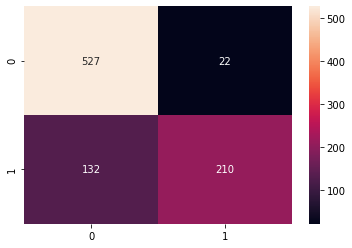

In [26]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)

print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

# plotting the confusion matrix in heatmap
matrix = metrics.confusion_matrix(Y_train, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()

In [28]:
submit = pd.DataFrame({"PassengerId":test_data.PassengerId, 'Survived':predict})
submit.to_csv("final_submission.csv",index = False)
submit.shape

(418, 2)